In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
  
df = pd.read_csv("/content/drive/MyDrive/Hotel Bookings.csv")
df.head()
df.shape

(119390, 32)

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df = df.drop(columns = ['agent', 'company'])

In [ ]:
df = df.dropna(axis = 0)

In [ ]:
df.isnull().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
df.shape

(118898, 30)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


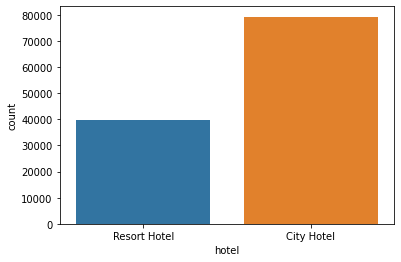

In [ ]:
import seaborn as sns
sns.countplot(x='hotel',data=df)

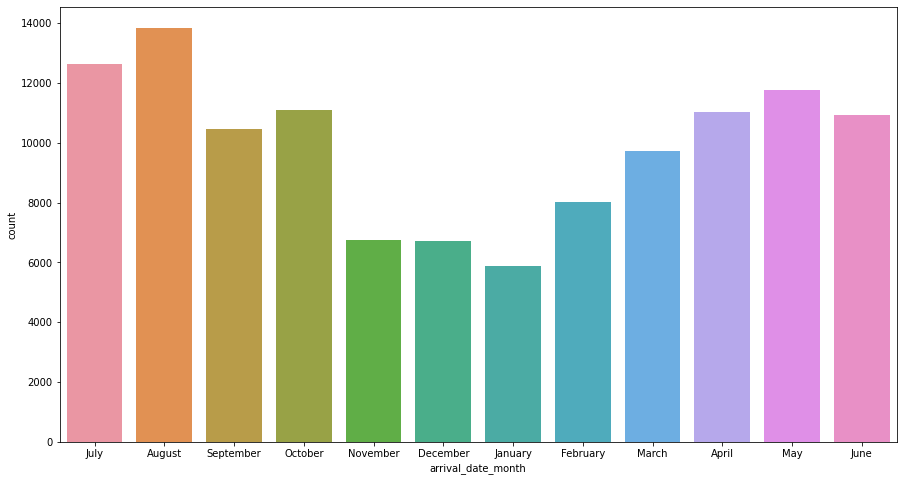

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,8))
sns.countplot(x='arrival_date_month',data=df)

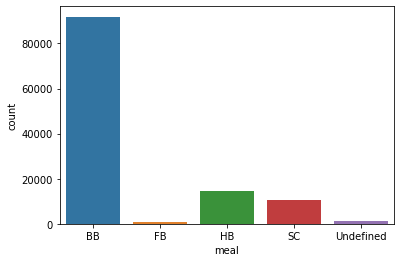

In [ ]:
sns.countplot(x='meal',data=df)

Text(0.5, 1.0, 'Types of market segment')

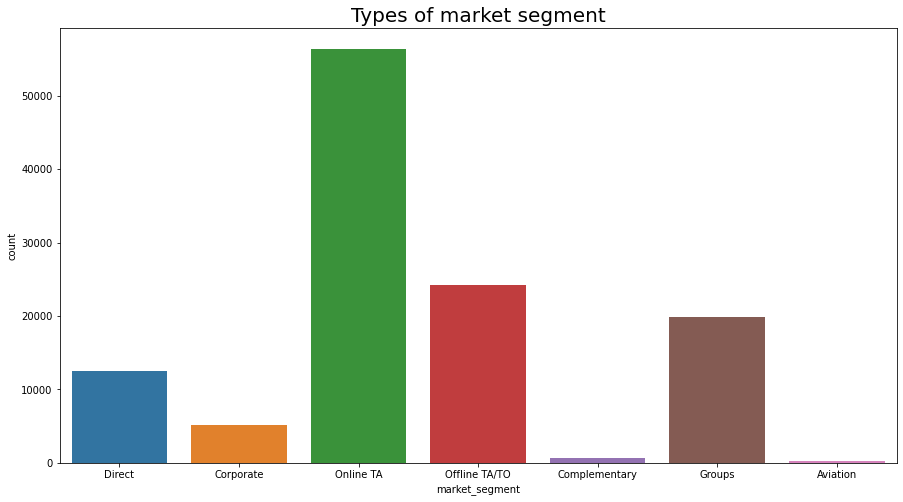

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='market_segment',data=df).set_title('Types of market segment', fontsize = 20)

Text(0.5, 1.0, 'Types of Distribution Channel')

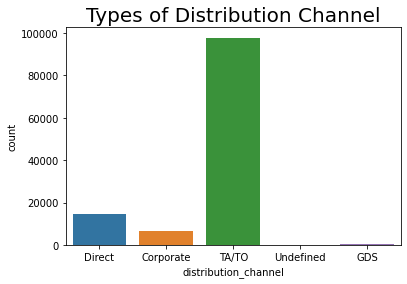

In [ ]:
sns.countplot(x='distribution_channel',data=df).set_title('Types of Distribution Channel', fontsize = 20)

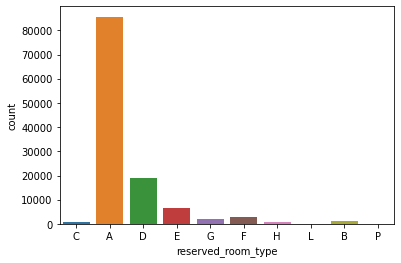

In [ ]:
sns.countplot(x='reserved_room_type',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


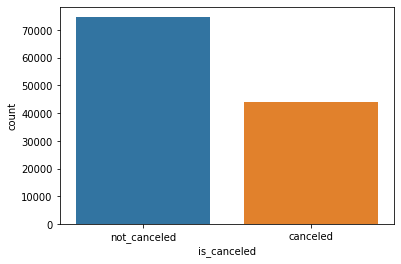

In [ ]:
df['is_canceled'] = df.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
canceled_data = df['is_canceled']
sns.countplot(canceled_data)

In [ ]:
print('{0:.2f}% of all bookings are cancelled.'.format(df.is_canceled.value_counts()[1]*100/df.is_canceled.count()))

37.14% of all bookings are cancelled.


Text(0.5, 1.0, 'Graph showing cancellation rates in city and resort hotel')

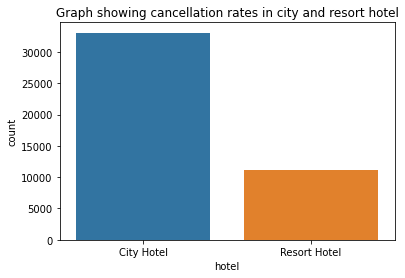

In [ ]:
lst1 = ['is_canceled', 'hotel']
type_of_hotel_canceled = df[lst1]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'canceled'].groupby(['hotel']).size().reset_index(name = 'count')
sns.barplot(data = canceled_hotel, x = 'hotel', y = 'count').set_title('Graph showing cancellation rates in city and resort hotel')

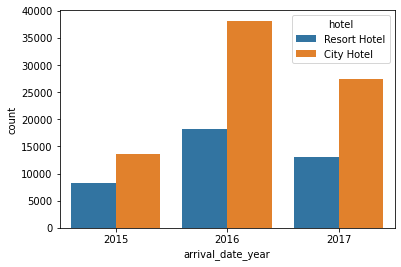

In [ ]:
lst3 = ['hotel', 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month' ]
period_arrival = df[lst3]
sns.countplot(data = period_arrival, x = 'arrival_date_year', hue = 'hotel')

Text(0, 0.5, 'Count')

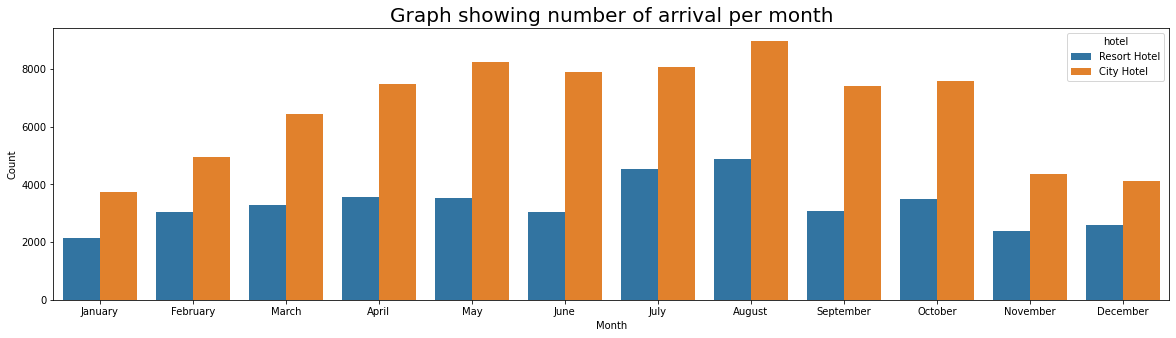

In [ ]:
plt.figure(figsize=(20,5))

sns.countplot(data = period_arrival, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Graph showing number of arrival per month',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Count')

Text(0.5, 1.0, 'Graph showing number of arrival per day')

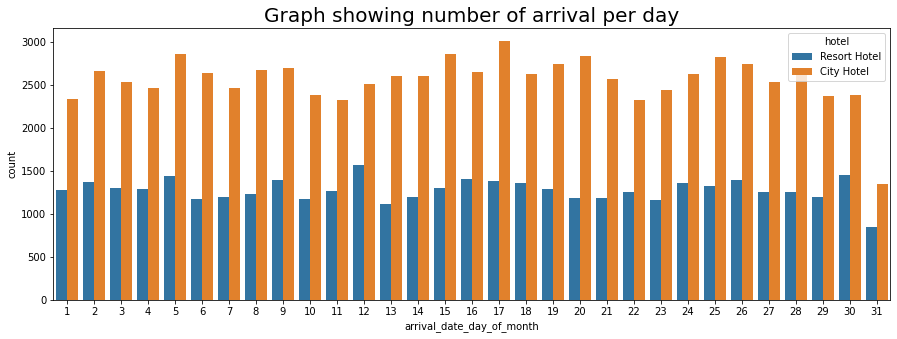

In [ ]:
plt.figure(figsize=(15,5))

sns.countplot(data = period_arrival, x = 'arrival_date_day_of_month', hue = 'hotel').set_title('Graph showing number of arrival per day', fontsize = 20)

Text(0.5, 1.0, 'Number of adults')

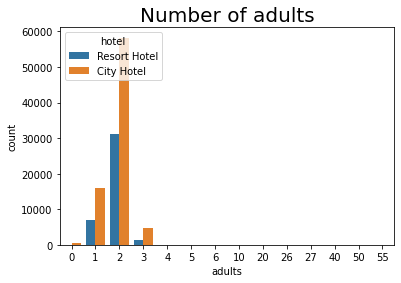

In [ ]:
sns.countplot(data = df, x = 'adults', hue = 'hotel').set_title("Number of adults", fontsize = 20)

Text(0.5, 1.0, 'Number of children')

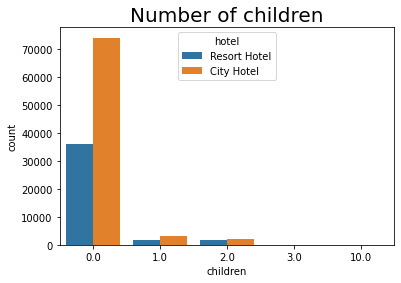

In [ ]:
sns.countplot(data = df, x = 'children', hue = 'hotel').set_title("Number of children", fontsize = 20)

Text(0.5, 1.0, 'Number of babies')

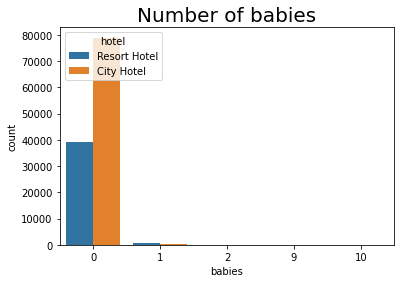

In [ ]:
sns.countplot(data = df, x = 'babies', hue = 'hotel').set_title("Number of babies", fontsize = 20)


Text(0.5, 1.0, 'Types of market segment')

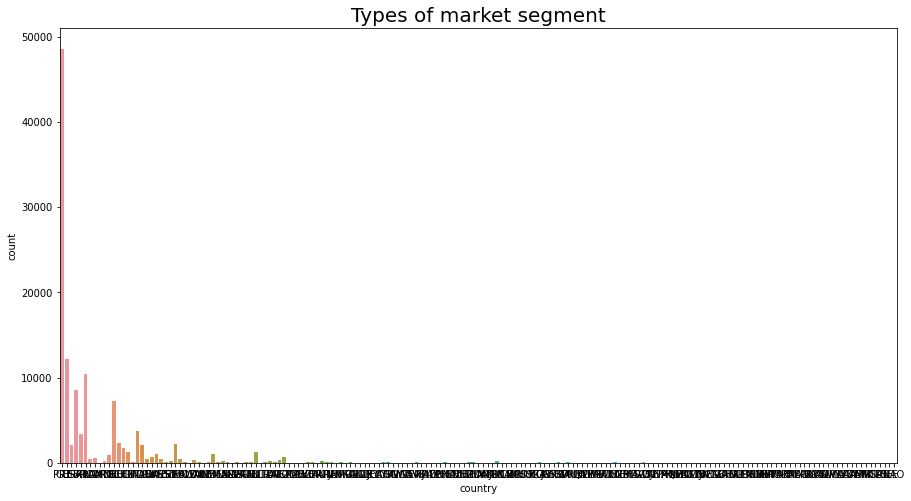

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='country',data=df).set_title('Types of market segment', fontsize = 20)

In [ ]:
country_visitors = df[df['is_canceled'] == 'not_canceled'].groupby(['country']).size().reset_index(name = 'count')

# We will be using Plotly.express to plot a choropleth map. Big fan of Plotly here!
import plotly.express as px

px.choropleth(country_visitors,
                    locations = "country",
                    color= "count", 
                    hover_name= "country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of visitors")

Text(0.5, 1.0, 'Graph showing types of deposits')

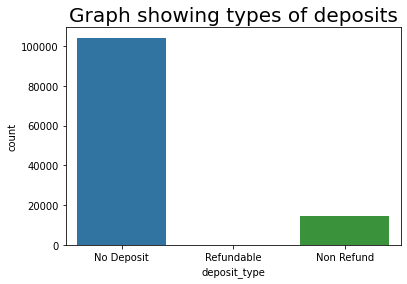

In [ ]:
sns.countplot(data = df, x = 'deposit_type').set_title('Graph showing types of deposits', fontsize = 20)

Text(0.5, 1.0, 'Graph showing whether guest is repeated guest')

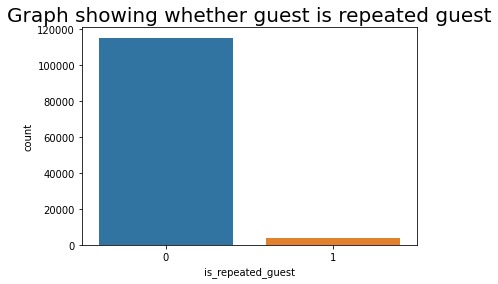

In [ ]:
sns.countplot(data = df, x = 'is_repeated_guest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)

Text(0.5, 1.0, 'Graph showing type of guest')

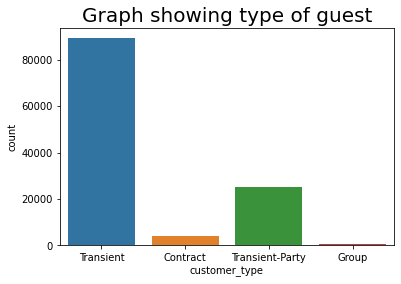

In [ ]:
sns.countplot(data = df, x = 'customer_type').set_title('Graph showing type of guest', fontsize = 20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



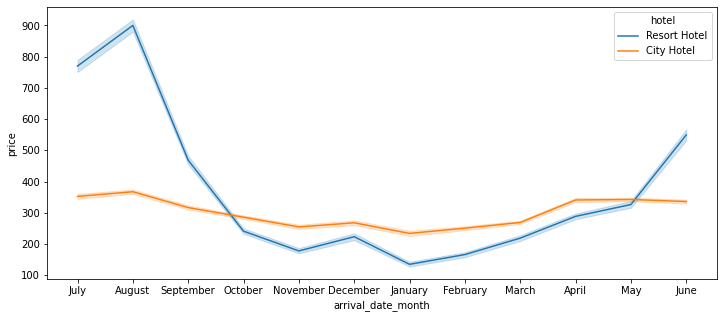

In [ ]:
# Resizing plot 
plt.figure(figsize=(12,5))

# Calculating average daily rate per person
df['adr_pp'] = df['adr'] / (df['adults'] + df['children']) 
actual_guests = df.loc[df["is_canceled"] == 'not_canceled']
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')

In [ ]:
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_pp
0,Resort Hotel,not_canceled,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
1,Resort Hotel,not_canceled,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
2,Resort Hotel,not_canceled,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0
3,Resort Hotel,not_canceled,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0
4,Resort Hotel,not_canceled,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,49.0


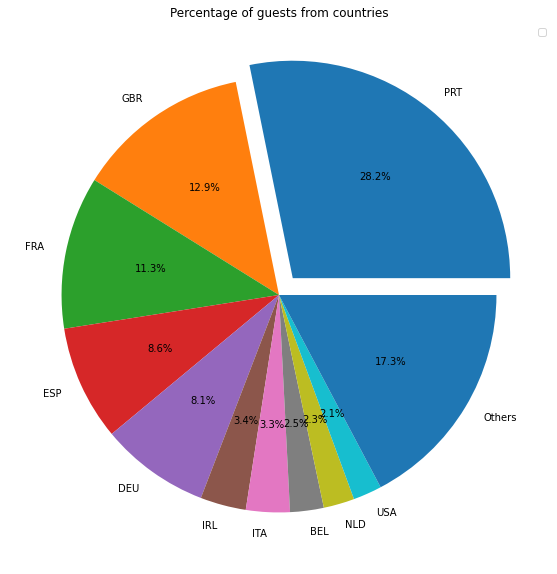

In [ ]:
from matplotlib import pyplot as plt
# Only non cancelled bookings included 
guests_per_country = df[df.is_canceled == 0].groupby('country').hotel.count().sort_values(ascending = False)
guests_per_country = guests_per_country.reset_index()
guests_per_country.rename(columns = {'hotel' : 'bookings'}, inplace = True)


# The top 10 countries with highest number of bookings
guests_per_country_top_10 = guests_per_country[:10].copy()

# Others countries bookings combined
new_row = pd.DataFrame(data = { 'country' : ['Others'],
                                'bookings' : [guests_per_country['bookings'][10:].sum()]
                                })

guests_per_country = pd.concat([guests_per_country_top_10, new_row])


#Pie chart Plot
fig = plt.figure(figsize =(10, 10)) 
plt.title("Percentage of guests from countries")
plt.legend(guests_per_country.index, loc="best")
plt.pie(guests_per_country.bookings , autopct='%1.1f%%', labels=guests_per_country.country , explode =(0.1,0,0,0,0,0,0,0,0,0,0));

In [ ]:
from datetime import datetime
df['arrival_date'] = df.apply(lambda x:datetime.strptime("{0} {1} {2}".format(x['arrival_date_year'],x['arrival_date_month'], x['arrival_date_day_of_month']), "%Y %B %d"),axis=1)
df[["arrival_date", "arrival_date_day_of_month","arrival_date_month","arrival_date_year"]].sample(5) 

,arrival_date,arrival_date_day_of_month,arrival_date_month,arrival_date_year
35108,2017-04-07,7,April,2017
91860,2016-06-24,24,June,2016
66906,2017-04-26,26,April,2017
48002,2016-03-11,11,March,2016
68806,2017-05-20,20,May,2017


      arrival_date  hotel month_year
11       July-2015   2763 2015-07-01
2      August-2015   3873 2015-08-01
24  September-2015   5084 2015-09-01
22    October-2015   4919 2015-10-01
20   November-2015   2320 2015-11-01


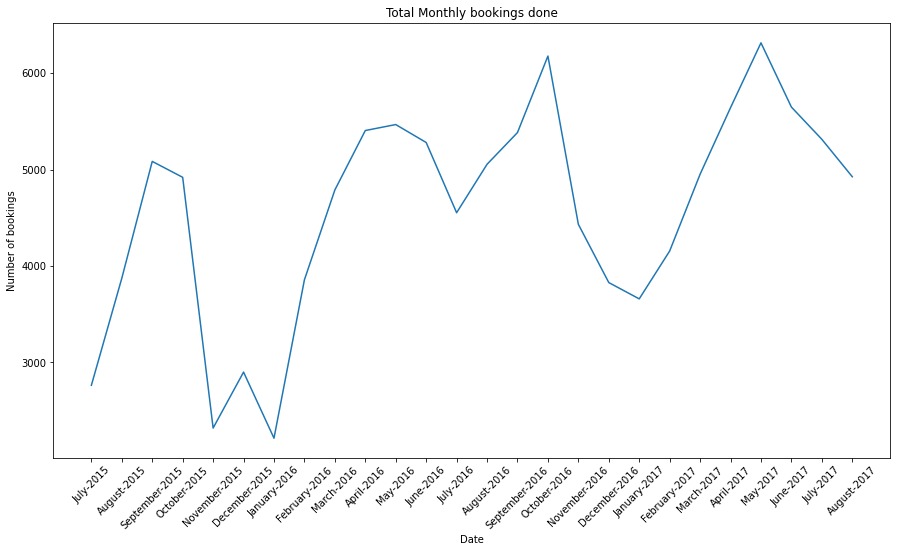

In [ ]:
# Get total monthly bookings
bookings_per_month = df.groupby(df['arrival_date'].dt.strftime('%B-%Y')).count().hotel  # convert arrival date to month-year format to count total no of bookings in a month
bookings_per_month = bookings_per_month.reset_index()

bookings_per_month['month_year'] = pd.to_datetime(bookings_per_month.arrival_date, format='%B-%Y')  # Convert month-year to datetime and create new column to sort values
bookings_per_month = bookings_per_month.sort_values('month_year')  

print(bookings_per_month.head())


# Plot monthly bookings 

plt.figure(figsize=(15, 8))
plt.title("Total Monthly bookings done")
plt.xlabel("Date")
plt.ylabel("Number of bookings")
plt.plot(bookings_per_month.arrival_date , bookings_per_month.hotel);
plt.xticks(rotation=45);

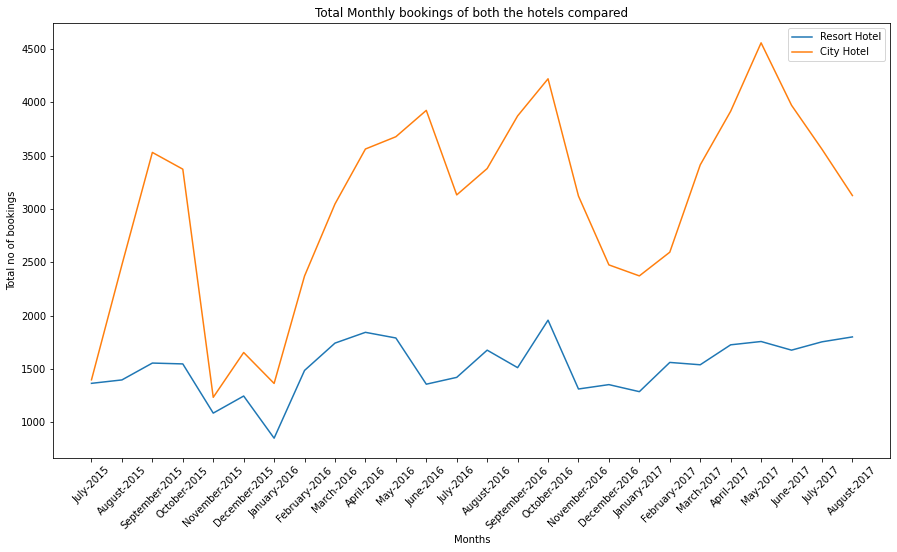

In [ ]:
bookings_per_month = df.groupby(['hotel',  df['arrival_date'].dt.strftime('%B-%Y')]).count().lead_time
bookings_per_month = bookings_per_month.reset_index()
bookings_per_month.rename(columns = {'lead_time':'bookings'} , inplace = True)
bookings_per_month
bookings_per_month['month_year'] = pd.to_datetime(bookings_per_month.arrival_date, format='%B-%Y')  # Convert to datetime to sort values
bookings_per_month = bookings_per_month.sort_values('month_year')  
# print(bookings_per_month.head())

# bookings_per_month = bookings_per_month.unstack()
bookings_per_month_rh = bookings_per_month[bookings_per_month.hotel == 'Resort Hotel']
bookings_per_month_ch = bookings_per_month[bookings_per_month.hotel == 'City Hotel']


plt.figure(figsize=(15, 8))
plt.title("Total Monthly bookings of both the hotels compared")
plt.xlabel("Months")
plt.ylabel("Total no of bookings")
plt.plot(bookings_per_month_rh.arrival_date , bookings_per_month_rh.bookings);
plt.plot(bookings_per_month_ch.arrival_date , bookings_per_month_ch.bookings);
plt.legend(["Resort Hotel","City Hotel"])
plt.xticks(rotation=45);
                          

     customer_type  is_canceled  bookings
0         Contract            0      2814
1         Contract            1      1262
2            Group            0       512
3            Group            1        58
4        Transient            0     52714
5        Transient            1     36460
6  Transient-Party            0     18705
7  Transient-Party            1      6373


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


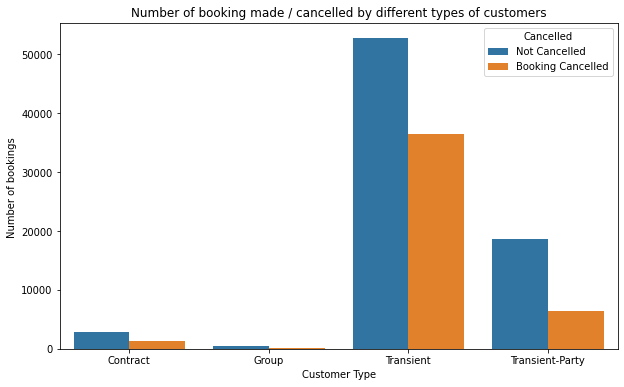

In [ ]:
import seaborn as sns
# Bookings done including cancelled bookings made by different types of customers.

# df.customer_type.unique()
customer_bookings = df.groupby(['customer_type','is_canceled']).count().hotel.reset_index()
customer_bookings.rename(columns = {'hotel':'bookings'} , inplace = True)
print(customer_bookings)

# Plotting The graph
plt.figure(figsize = (10,6))

ax = sns.barplot('customer_type', 'bookings', hue='is_canceled', data=customer_bookings );

plt.title("Number of booking made / cancelled by different types of customers")
plt.xlabel("Customer Type")
plt.ylabel("Number of bookings ")

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Not Cancelled', 'Booking Cancelled'], title='Cancelled');

     customer_type         hotel  bookings
0         Contract    City Hotel      2300
1         Contract  Resort Hotel      1776
2            Group    City Hotel       292
3            Group  Resort Hotel       278
4        Transient    City Hotel     59382
5        Transient  Resort Hotel     29792
6  Transient-Party    City Hotel     17328
7  Transient-Party  Resort Hotel      7750


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


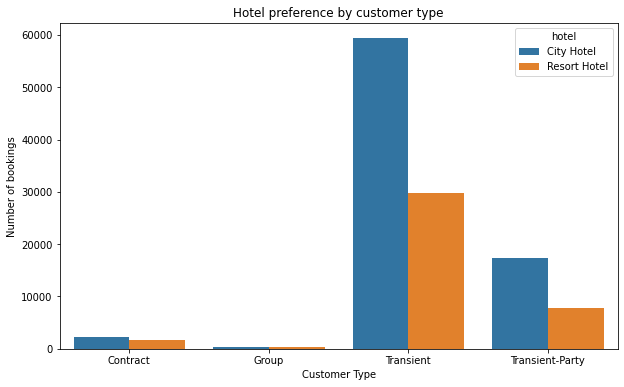

In [ ]:
# Bookings done including cancelled bookings made by different types of customers.

# df.customer_type.unique()
customer_bookings = df.groupby(['customer_type','hotel']).count().lead_time.reset_index()
customer_bookings.rename(columns = {'lead_time':'bookings'} , inplace = True)
print(customer_bookings)

# Plotting The graph
plt.figure(figsize = (10,6))

sns.barplot('customer_type', 'bookings', hue='hotel', data=customer_bookings );

plt.title("Hotel preference by customer type")
plt.xlabel("Customer Type")
plt.ylabel("Number of bookings");


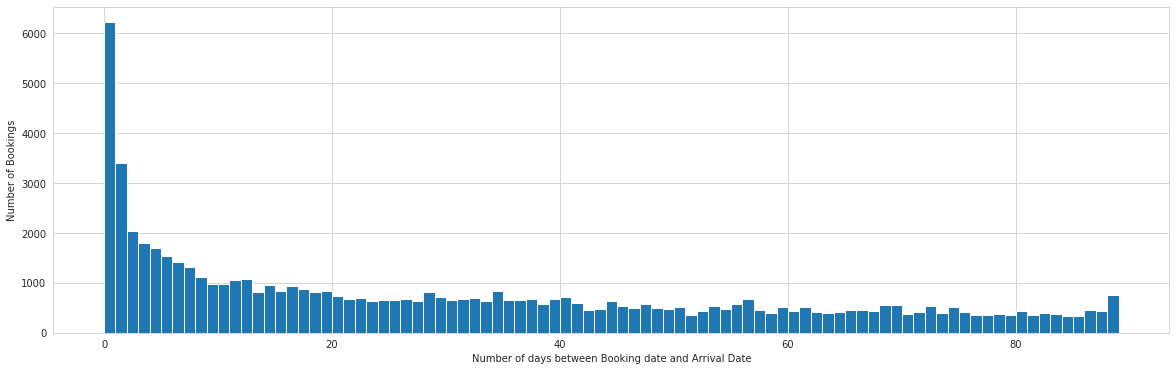

In [ ]:
import numpy as np
# Plot histogram for 90 days or 3 months of lead time

sns.set_style("whitegrid")
plt.figure(figsize = (20,6))
plt.hist(df.lead_time, bins=np.arange(0, 90, 1));


plt.xlabel("Number of days between Booking date and Arrival Date")
plt.ylabel("Number of Bookings");

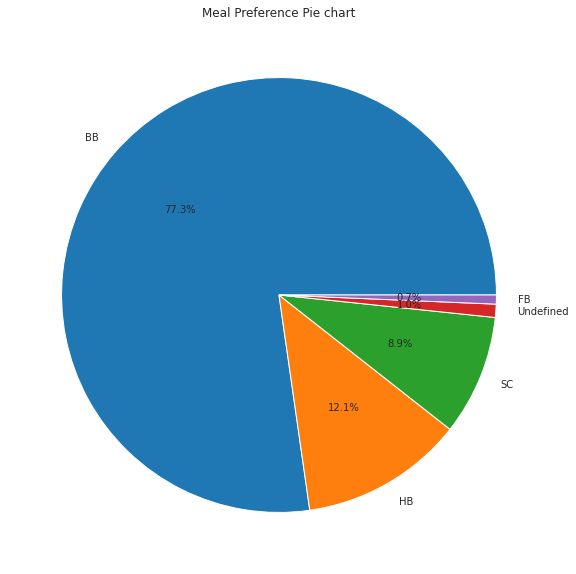

In [ ]:
meal_preference = df.meal.value_counts()
meal_preference.index.name = "meal_type"
meal_preference = meal_preference.reset_index()
meal_preference

plt.figure(figsize = (15,10))
plt.pie(meal_preference.meal, autopct='%1.1f%%', labels=meal_preference.meal_type);

plt.title("Meal Preference Pie chart");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


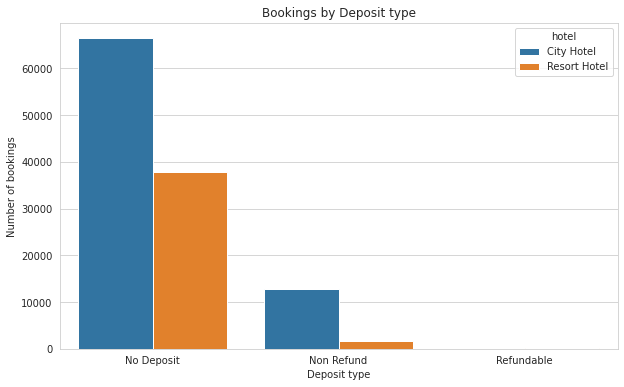

In [ ]:
deposit_type_by_hotel  = df.groupby(["hotel","deposit_type"]).lead_time.count()
deposit_type_by_hotel = deposit_type_by_hotel.reset_index()
deposit_type_by_hotel.rename(columns = {"lead_time":"bookings"}, inplace = True)
deposit_type_by_hotel

plt.figure(figsize = (10,6))

sns.barplot('deposit_type', 'bookings', hue='hotel', data=deposit_type_by_hotel );
plt.title("Bookings by Deposit type")
plt.xlabel("Deposit type")
plt.ylabel("Number of bookings");